In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from cosinorage.dataloaders import AccelerometerDataLoader, ENMODataLoader, DataLoader
from cosinorage.dataloaders.utils import auto_calibrate

In [2]:
reload = False

In [3]:
if reload:
    loader = DataLoader(datasource='smartwatch', input_path='../data/62164/')
    loader.load_data()
    with open("loader.pkl", "wb") as file:
        pickle.dump(loader, file)
else:
    with open("loader.pkl", "rb") as file:
        loader = pickle.load(file)

In [4]:
results = auto_calibrate(loader.get_acc_data()[['X', 'Y', 'Z']], 80)

Iteration 1: Residual = 0.00038166572068082285
Iteration 2: Residual = 0.026518427349407965
Iteration 3: Residual = 0.03731251753792876
Iteration 4: Residual = 0.05787359258359817
Iteration 5: Residual = 0.09533425704029644
Iteration 6: Residual = 0.16065999654596494
Iteration 7: Residual = 0.2688789248466208
Iteration 8: Residual = 0.4262816927332735
Iteration 9: Residual = 0.5348174776832775
Iteration 10: Residual = 0.3679775435100615
Iteration 11: Residual = 0.3075861555711795
Iteration 12: Residual = 0.34437537086011016
Iteration 13: Residual = 0.33036113179311205
Iteration 14: Residual = 0.32867142506044206
Iteration 15: Residual = 0.3284993783267077
Iteration 16: Residual = 0.3281773993194302
Iteration 17: Residual = 0.32778661369869194
Iteration 18: Residual = 0.3274112510015464
Iteration 19: Residual = 0.3270644498092012
Iteration 20: Residual = 0.3267704278343335
Iteration 21: Residual = 0.3264428819189029
Iteration 22: Residual = 0.3261071283706805
Iteration 23: Residual = 0.

In [6]:
results

{'scale': array([0.66296176, 1.1437929 , 0.26147126]),
 'offset': array([ 0.48765817,  0.24736548, -0.82072853]),
 'calib_error_start': np.float64(0.019900845583211396),
 'calib_error_end': np.float64(0.019900845583211396),
 'npoints': 13998836}

In [9]:
new = results['offset'] + results['scale'] * loader.get_acc_data()[['X', 'Y', 'Z']]

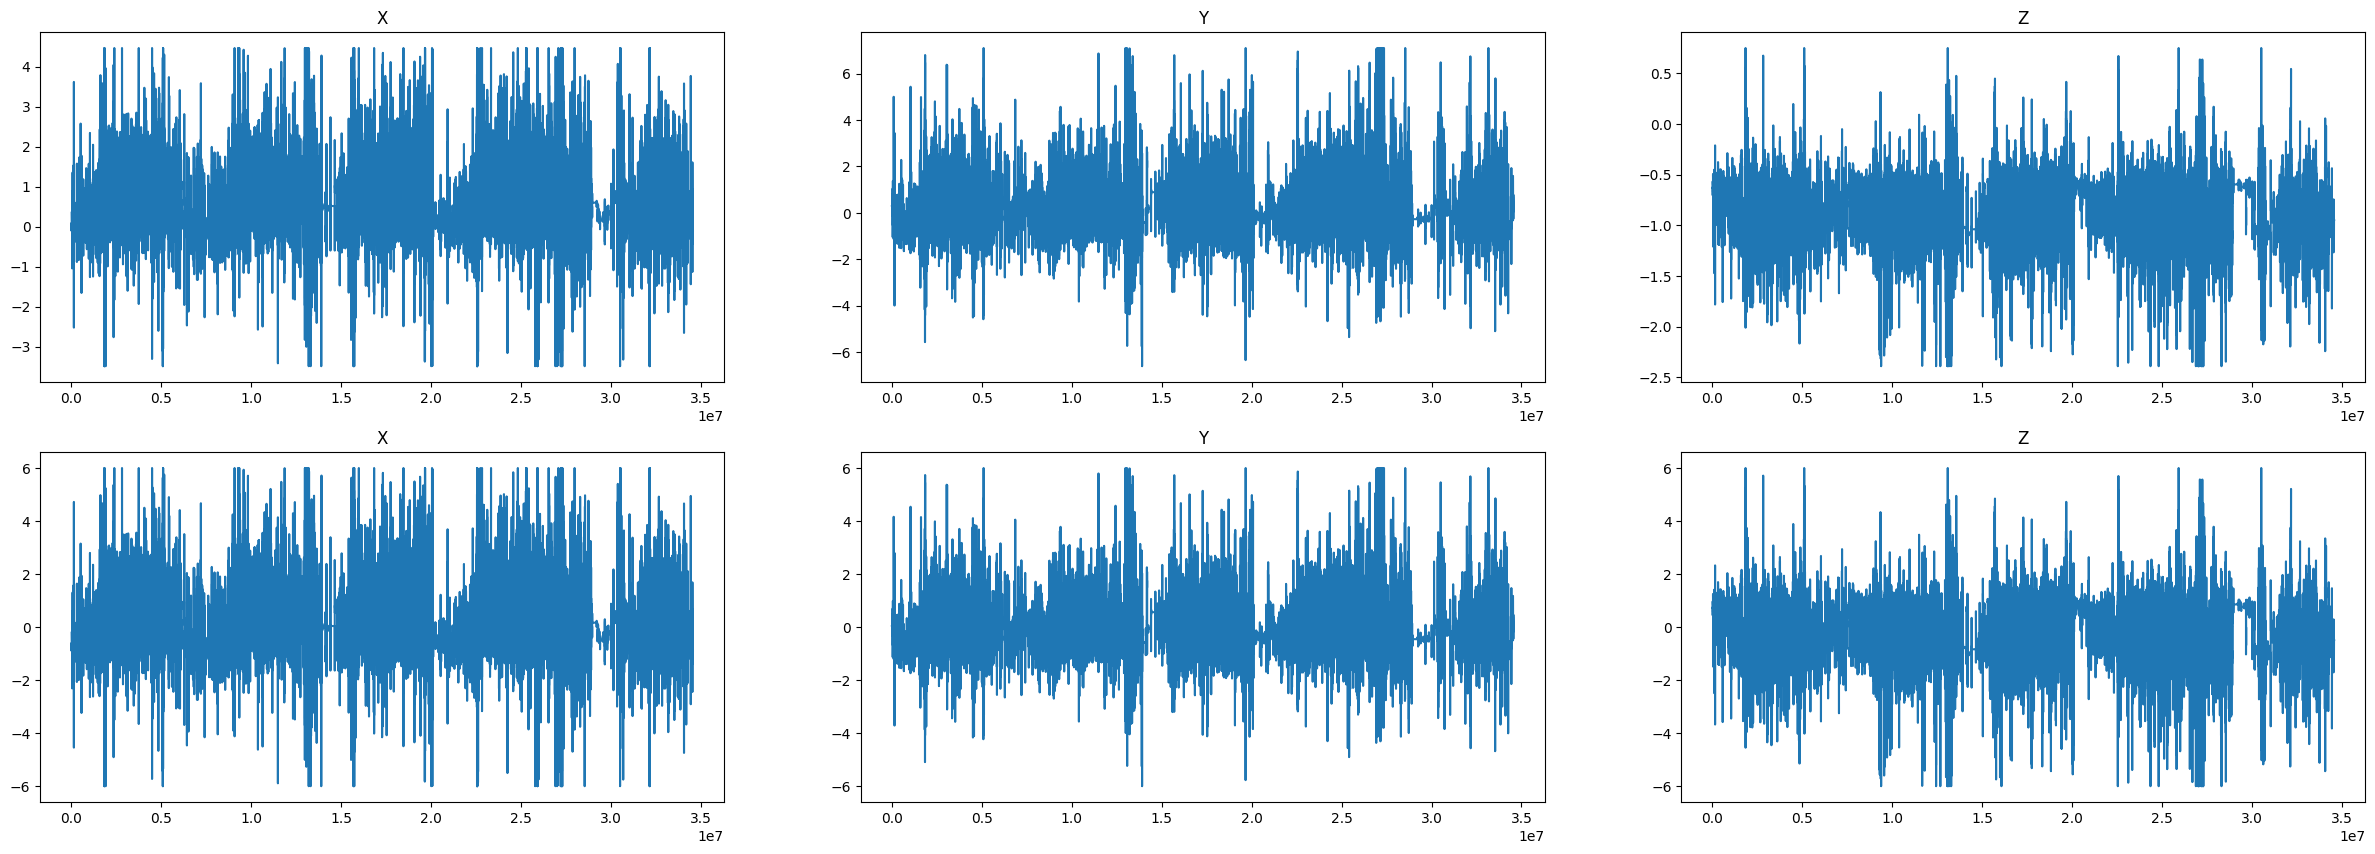

In [10]:
# plot in three figures
fig, axs = plt.subplots(2, 3, figsize=(30, 10))
axs[0,0].plot(new['X'])
axs[0,0].set_title('X')
axs[0,1].plot(new['Y'])
axs[0,1].set_title('Y')
axs[0,2].plot(new['Z'])
axs[0,2].set_title('Z')
axs[1,0].plot(loader.get_acc_data()['X'])
axs[1,0].set_title('X')
axs[1,1].plot(loader.get_acc_data()['Y'])
axs[1,1].set_title('Y')
axs[1,2].plot(loader.get_acc_data()['Z'])
axs[1,2].set_title('Z')
plt.show()

In [11]:
old = np.sqrt(loader.get_acc_data()['X']**2 + loader.get_acc_data()['Y']**2 + loader.get_acc_data()['Z']**2)
new_ = np.sqrt(new['X']**2 + new['Y']**2 + new['Z']**2)

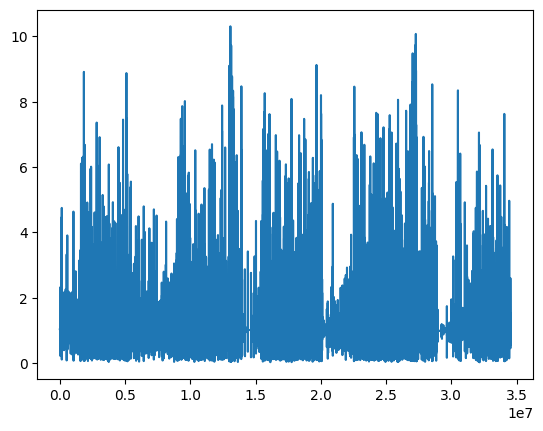

In [12]:
plt.plot(old)
plt.show()

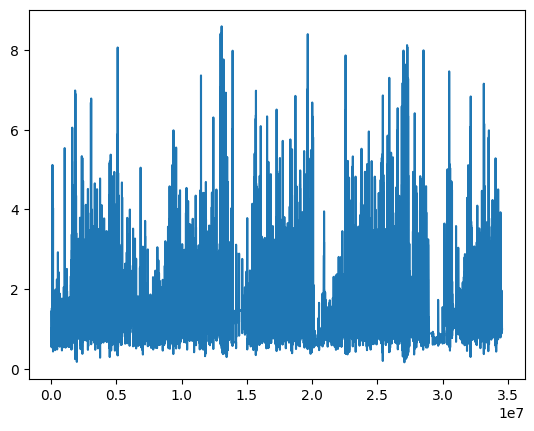

In [13]:
plt.plot(new_)
plt.show()